<a href="https://colab.research.google.com/github/santiago2205/CEIA/blob/master/TP_Integrador_An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Desarrollo del TP Integrador Analisis de datos

## Importar librerias y dataset

In [3]:
!pip install -U pandas_profiling

     |████████████████████████████████| 256kB 6.5MB/s 
     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 645kB 8.5MB/s 
     |████████████████████████████████| 112kB 16.0MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 10.1MB 12.4MB/s 
     |████████████████████████████████| 1.1MB 39.3MB/s 
     |████████████████████████████████| 3.1MB 34.3MB/s 
     |████████████████████████████████| 296kB 37.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=8b79bc36eb7c66834f11729ceb382a3b457c4ea70ae2f5367707943db012ee7f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=de024da937847328490b570d1d1e51fce1eda38a7f693adfdde4db08a0a04ebe
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d8565

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_profiling
import pandas_profiling

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/weatherAUS.csv')

In [6]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
#report = df.profile_report(sort=None, html={"style": {"full_width": True}}, progress_bar=False)
#report

## Análisis exploratorio inicial

### Variables de entrada
A continuaciona analizaremos los tipos de variables de entrada, la correlacion que hay entre ellas y la cantidad de NaN que contienen.

#### Vaiables Numericas

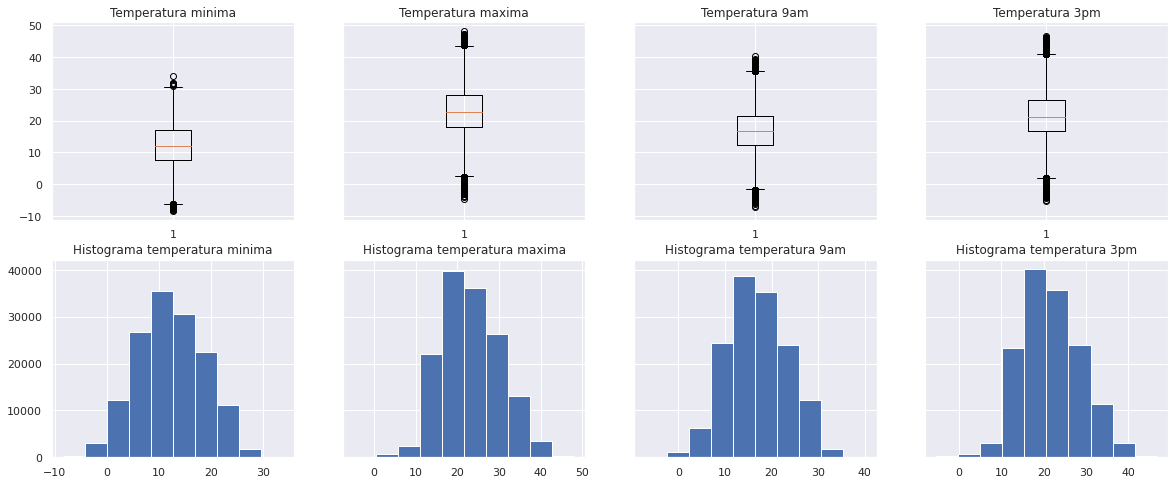

In [10]:
# MinTemp, MaxTemp, Temp9am, Temp3pm

fig, ax = plt.subplots(2, 4, sharey='row', figsize=(20,8))

ax[0,0].boxplot(df.loc[df['MinTemp'].isna()==False, 'MinTemp'])
ax[0,0].set_title('Temperatura minima')
ax[1,0].hist(df.loc[df['MinTemp'].isna()==False, 'MinTemp'])
ax[1,0].set_title('Histograma temperatura minima')

ax[0,1].boxplot(df.loc[df['MaxTemp'].isna()==False, 'MaxTemp'])
ax[0,1].set_title('Temperatura maxima')
ax[1,1].hist(df.loc[df['MaxTemp'].isna()==False, 'MaxTemp'])
ax[1,1].set_title('Histograma temperatura maxima')

ax[0,2].boxplot(df.loc[df['Temp9am'].isna()==False, 'Temp9am'])
ax[0,2].set_title('Temperatura 9am')
ax[1,2].hist(df.loc[df['Temp9am'].isna()==False, 'Temp9am'])
ax[1,2].set_title('Histograma temperatura 9am')

ax[0,3].boxplot(df.loc[df['Temp3pm'].isna()==False, 'Temp3pm'])
ax[0,3].set_title('Temperatura 3pm')
ax[1,3].hist(df.loc[df['Temp3pm'].isna()==False, 'Temp3pm'])
ax[1,3].set_title('Histograma temperatura 3pm')

plt.show()


A partir de los histogramas se observa que las temperaturas minimas y las temperaturas a las 9 am no presentan grandes diferencia, lo mismo para el caso de la temperatura maxima y la temperatura a las 3pm. Ambas tiene una distribucion normal, centrada, por lo que no se realizaran transformaciones en ese sentido.
Esto nos induce a analizar la correlacion entre estas variables y de ser alta, se eliminaria para no trabajar con datos duplicados.

Text(0.5, 1.0, 'Histograma nubosidad 3pm')

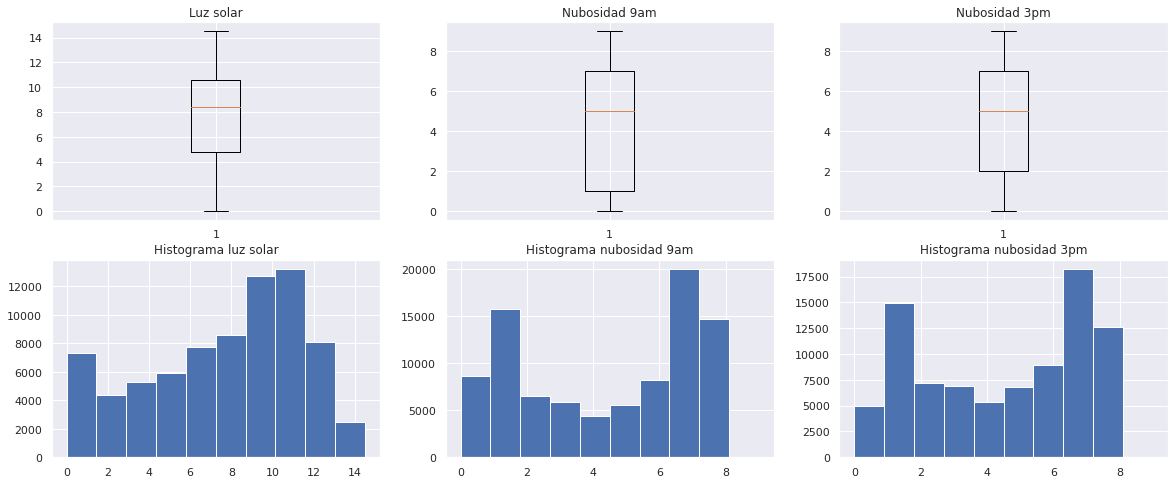

In [11]:
#Sol, nubosidad 9am, nubosidad 3pm

fig, ax = plt.subplots(2, 3, figsize=(20,8))

ax[0,0].boxplot(df.loc[df['Sunshine'].isna()==False, 'Sunshine'])
ax[0,0].set_title('Luz solar')
ax[1,0].hist(df.loc[df['Sunshine'].isna()==False, 'Sunshine'])
ax[1,0].set_title('Histograma luz solar')

ax[0,1].boxplot(df.loc[df['Cloud9am'].isna()==False, 'Cloud9am'])
ax[0,1].set_title('Nubosidad 9am')
ax[1,1].hist(df.loc[df['Cloud9am'].isna()==False, 'Cloud9am'])
ax[1,1].set_title('Histograma nubosidad 9am')

ax[0,2].boxplot(df.loc[df['Cloud3pm'].isna()==False, 'Cloud3pm'])
ax[0,2].set_title('Nubosidad 3pm')
ax[1,2].hist(df.loc[df['Cloud3pm'].isna()==False, 'Cloud3pm'])
ax[1,2].set_title('Histograma nubosidad 3pm')

Se puede observar en los histogramas y boxplot de nubosidad que su distribucion para los valor de nubosidad a las 9am y nuosidad a las 3pm son bastante similares y aparentemene bimodales con gran concentracion de datos a la izquierda y derecha, posiblemente representando nubosidad baja o alta respectivamente, mientras que en el centro hay pocos caso. Para el caso de luz solar, se evidencia un leve corrimiento hacia la derecha. Intuyendo relacion entre nubosidad y luz solar se buscará graficar la misma como se obserba abajo.

In [12]:
#Mascara para quitar los NaN de las colunas a analizar (Lo optimo seria armar dos mascaras pero por extension se hizo una)
mask_nans = ((df['Sunshine'].isna()==False) & (df['Cloud9am'].isna()==False) & (df['Cloud3pm'].isna()==False))

In [13]:
#Armamos un nuevo dataframe
df_sunshine_cloud = df.loc[mask_nans, ['Sunshine', 'Cloud3pm','Cloud9am']].groupby('Sunshine').mean().reset_index()

Text(0, 0.5, 'Nubosidad 3pm')

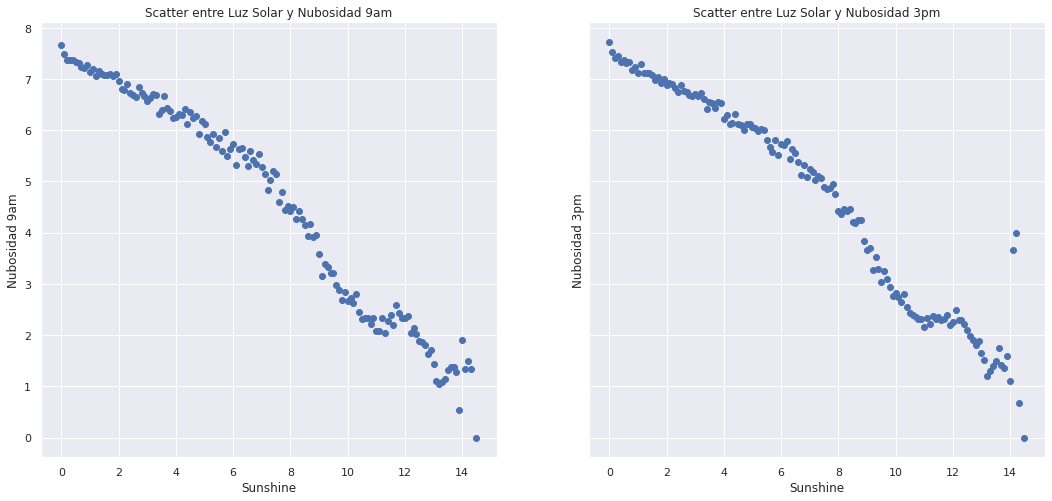

In [14]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(18,8))
plt.title('Scatter plot entre Luz Solar y Nubosidad')

ax[0].scatter(df_sunshine_cloud['Sunshine'], df_sunshine_cloud['Cloud9am'])
ax[0].set_title('Scatter entre Luz Solar y Nubosidad 9am')
ax[0].set_xlabel('Sunshine')
ax[0].set_ylabel('Nubosidad 9am')

ax[1].scatter(df_sunshine_cloud['Sunshine'], df_sunshine_cloud['Cloud3pm'])
ax[1].set_title('Scatter entre Luz Solar y Nubosidad 3pm')
ax[1].set_xlabel('Sunshine')
ax[1].set_ylabel('Nubosidad 3pm')


Como se observa en los graficos anteriores, existe una fuerte correlacion entre luz solar y nubosidad (correlacion negativa) por lo que se puede evaluar descartar algunas de las features. Por otro lado, no se observan grandes diferencias entre la nubosidad entre las 9am y 3pm por lo que se podria omitir uno de esos datos por ser repetidos.

Text(0.5, 1.0, 'Histograma velocidad del viento 3pm')

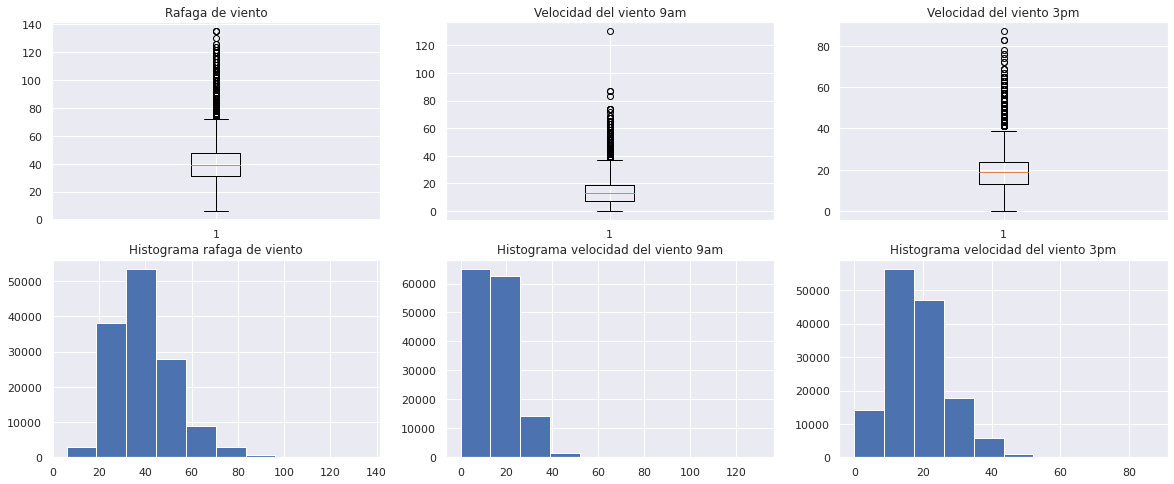

In [15]:
#Rafaga de viento, Viento 9am, viento 3pm

fig, ax = plt.subplots(2, 3, figsize=(20,8))

ax[0,0].boxplot(df.loc[df['WindGustSpeed'].isna()==False, 'WindGustSpeed'])
ax[0,0].set_title('Rafaga de viento')
ax[1,0].hist(df.loc[df['WindGustSpeed'].isna()==False, 'WindGustSpeed'])
ax[1,0].set_title('Histograma rafaga de viento')

ax[0,1].boxplot(df.loc[df['WindSpeed9am'].isna()==False, 'WindSpeed9am'])
ax[0,1].set_title('Velocidad del viento 9am')
ax[1,1].hist(df.loc[df['WindSpeed9am'].isna()==False, 'WindSpeed9am'])
ax[1,1].set_title('Histograma velocidad del viento 9am')

ax[0,2].boxplot(df.loc[df['WindSpeed3pm'].isna()==False, 'WindSpeed3pm'])
ax[0,2].set_title('Velocidad del viento 3pm')
ax[1,2].hist(df.loc[df['WindSpeed3pm'].isna()==False, 'WindSpeed3pm'])
ax[1,2].set_title('Histograma velocidad del viento 3pm')

Como era de esperar la media de los datos de la rafaga de viento son superiores a las del viento a las 9am y 3pm, por otro lado el viento a las 3pm pareciera tener velocidades mas altas que el viento de las 9am, la distribucion de los datos de la velocidad de viento tienen un leve corrimiento hacia la izquierda y en todos los casos se observan bastantes outliers (considerados por rango intercuartilico) con velocidades de viento alto.

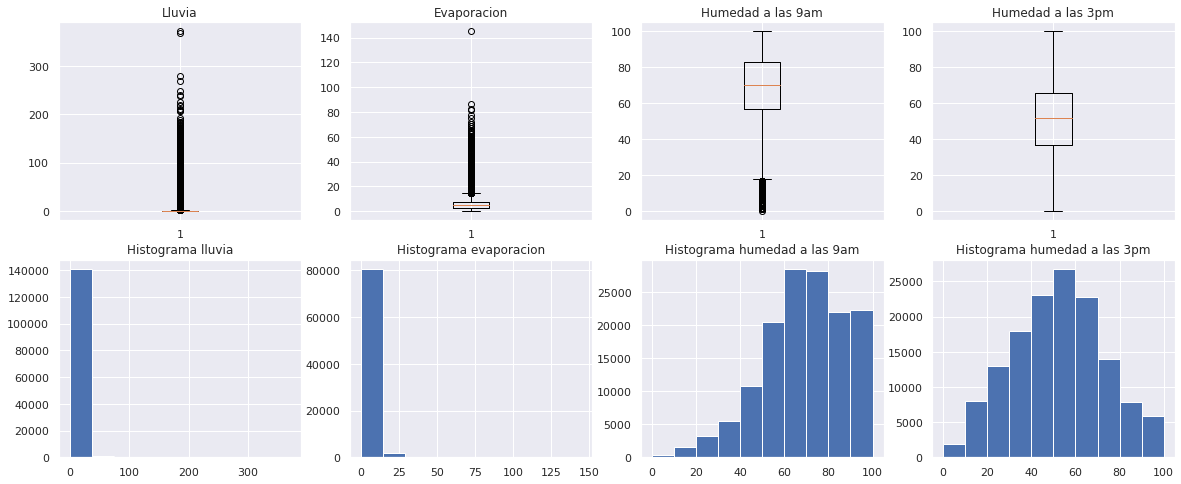

In [16]:
# Lluvia, Evaporacion, presion 9am, presion 3pm

fig, ax = plt.subplots(2, 4,  figsize=(20,8))

ax[0,0].boxplot(df.loc[df['Rainfall'].isna()==False, 'Rainfall'])
ax[0,0].set_title('Lluvia')
ax[1,0].hist(df.loc[df['Rainfall'].isna()==False, 'Rainfall'])
ax[1,0].set_title('Histograma lluvia')

ax[0,1].boxplot(df.loc[df['Evaporation'].isna()==False, 'Evaporation'])
ax[0,1].set_title('Evaporacion')
ax[1,1].hist(df.loc[df['Evaporation'].isna()==False, 'Evaporation'])
ax[1,1].set_title('Histograma evaporacion')

ax[0,2].boxplot(df.loc[df['Humidity9am'].isna()==False, 'Humidity9am'])
ax[0,2].set_title('Humedad a las 9am')
ax[1,2].hist(df.loc[df['Humidity9am'].isna()==False, 'Humidity9am'])
ax[1,2].set_title('Histograma humedad a las 9am')

ax[0,3].boxplot(df.loc[df['Humidity3pm'].isna()==False, 'Humidity3pm'])
ax[0,3].set_title('Humedad a las 3pm')
ax[1,3].hist(df.loc[df['Humidity3pm'].isna()==False, 'Humidity3pm'])
ax[1,3].set_title('Histograma humedad a las 3pm')

plt.show()

De los dos plot de histogramas de lluvia y evaporacion, se deduce que los datos estan mayoritariamente concentrados en un rango estrecho determinado de la variable y el resto si lo analizamos por IQR, se considerarian outliers. Seria interesante ver la relacion de esos outliers con la variable de salida. Por otro lado, vemos que la huemdad es mayor a la mañana que al medio dia en prmedio, probablemente relacionado con el rocio, lo que se ve con el corrimiento hacia la derecha del histograma de la huemdad a las 9am y la distribucion de la humedad a las 3pm parece ser normal.

In [17]:
#Mascara para quitar los NaN de las colunas a analizar (Lo optimo seria armar dos mascaras pero por extension se hizo una)
mask_nans = ((df['Rainfall'].isna()==False) & (df['Evaporation'].isna()==False) & (df['Humidity3pm'].isna()==False))

#Armamos un nuevo dataframe
df_humid_rainfall_evap = df.loc[mask_nans, ['Humidity3pm', 'Rainfall','Evaporation']].groupby('Humidity3pm').mean().reset_index()

Text(0, 0.5, 'Evaporacion')

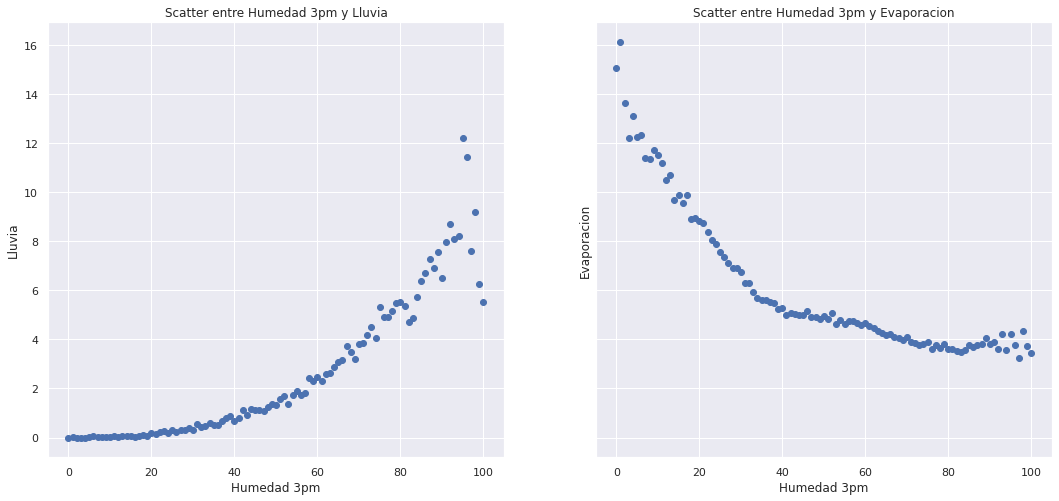

In [18]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(18,8))
plt.title('Scatter plot entre humedad, evaporacion y lluvia')

ax[0].scatter(df_humid_rainfall_evap['Humidity3pm'], df_humid_rainfall_evap['Rainfall'])
ax[0].set_title('Scatter entre Humedad 3pm y Lluvia')
ax[0].set_xlabel('Humedad 3pm')
ax[0].set_ylabel('Lluvia')

ax[1].scatter(df_humid_rainfall_evap['Humidity3pm'], df_humid_rainfall_evap['Evaporation'])
ax[1].set_title('Scatter entre Humedad 3pm y Evaporacion')
ax[1].set_xlabel('Humedad 3pm')
ax[1].set_ylabel('Evaporacion')

Se puede observar en los graficos de arriba que existe una relacion no lineal entre la humedad, las precipitaciones y evaporacion. En ambos casos, la relacion es monotona creciente y decreciente respectivamente. Se observan que para valores de 100% de huemdad, hay outliers de la media que se deberian analizar.

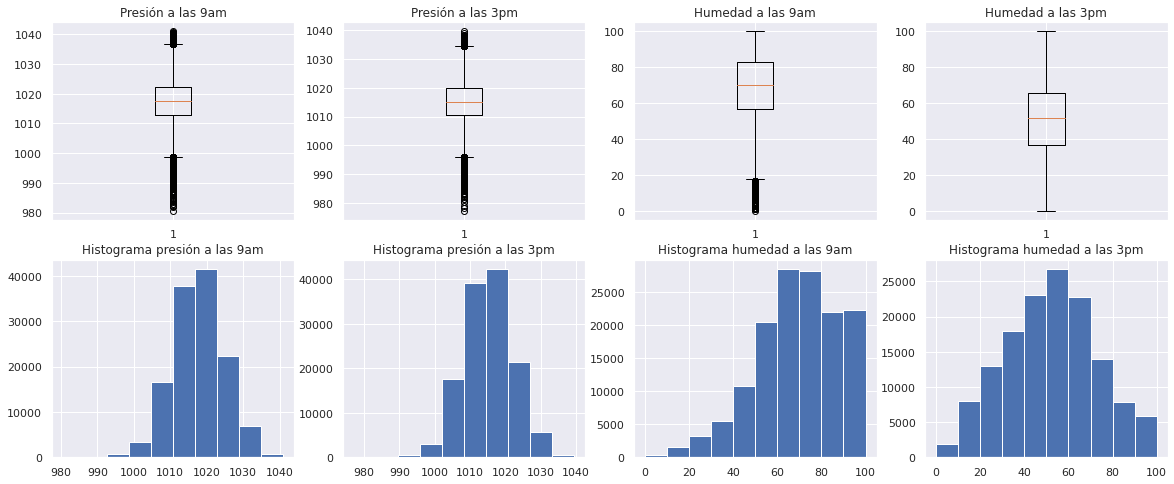

In [19]:
# Humedad, presion

fig, ax = plt.subplots(2, 4,  figsize=(20,8))

ax[0,0].boxplot(df.loc[df['Pressure9am'].isna()==False, 'Pressure9am'])
ax[0,0].set_title('Presión a las 9am')
ax[1,0].hist(df.loc[df['Pressure9am'].isna()==False, 'Pressure9am'])
ax[1,0].set_title('Histograma presión a las 9am')

ax[0,1].boxplot(df.loc[df['Pressure3pm'].isna()==False, 'Pressure3pm'])
ax[0,1].set_title('Presión a las 3pm')
ax[1,1].hist(df.loc[df['Pressure3pm'].isna()==False, 'Pressure3pm'])
ax[1,1].set_title('Histograma presión a las 3pm')

ax[0,2].boxplot(df.loc[df['Humidity9am'].isna()==False, 'Humidity9am'])
ax[0,2].set_title('Humedad a las 9am')
ax[1,2].hist(df.loc[df['Humidity9am'].isna()==False, 'Humidity9am'])
ax[1,2].set_title('Histograma humedad a las 9am')

ax[0,3].boxplot(df.loc[df['Humidity3pm'].isna()==False, 'Humidity3pm'])
ax[0,3].set_title('Humedad a las 3pm')
ax[1,3].hist(df.loc[df['Humidity3pm'].isna()==False, 'Humidity3pm'])
ax[1,3].set_title('Histograma humedad a las 3pm')

plt.show()

In [20]:
#Mascara para quitar los NaN de las colunas a analizar
mask_nans = ((df['Pressure9am'].isna()==False) & (df['Humidity9am'].isna()==False))

#Armamos un nuevo dataframe
df_humid_pres_9am = df.loc[mask_nans, ['Pressure9am', 'Humidity9am']].groupby('Pressure9am').mean().reset_index()

#Mascara para quitar los NaN de las colunas a analizar (Lo optimo seria armar dos mascaras pero por extension se hizo una)
mask_nans = ((df['Pressure3pm'].isna()==False) & (df['Humidity3pm'].isna()==False))

#Armamos un nuevo dataframe
df_humid_pres_3pm = df.loc[mask_nans, ['Pressure3pm', 'Humidity3pm']].groupby('Pressure3pm').mean().reset_index()

Text(0, 0.5, 'Humedad a las 3pm')

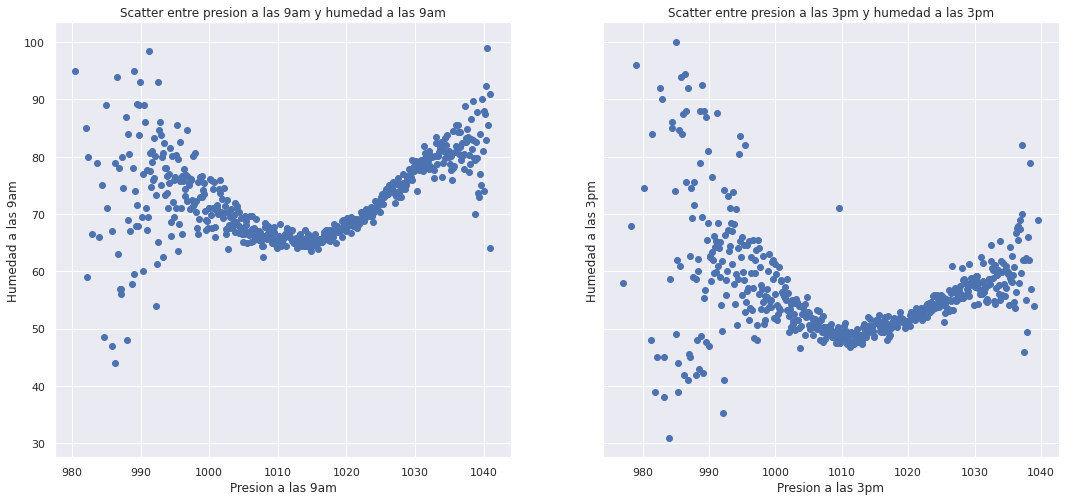

In [21]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(18,8))
plt.title('Scatter plot entre humedad, presion')

ax[0].scatter(df_humid_pres_9am['Pressure9am'], df_humid_pres_9am['Humidity9am'])
ax[0].set_title('Scatter entre presion a las 9am y humedad a las 9am')
ax[0].set_xlabel('Presion a las 9am')
ax[0].set_ylabel('Humedad a las 9am')

ax[1].scatter(df_humid_pres_3pm['Pressure3pm'], df_humid_pres_3pm['Humidity3pm'])
ax[1].set_title('Scatter entre presion a las 3pm y humedad a las 3pm')
ax[1].set_xlabel('Presion a las 3pm')
ax[1].set_ylabel('Humedad a las 3pm')

A continuacion se imprimira un grafico que mostrara la correlacion que existe entre las distintas variables numericas antes mencionadas.

In [ ]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

#### Variables Categoricas

Como primer variable categorica analizamos las localidades

In [23]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [24]:
df['Location'].unique().shape[0]

49

In [25]:
df[['Location', 'RainTomorrow']].groupby('Location').count()

,RainTomorrow
Location,
Adelaide,3090
Albany,3016
Albury,3011
AliceSprings,3031
BadgerysCreek,2928
Ballarat,3028
Bendigo,3034
Brisbane,3161
Cairns,2988


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


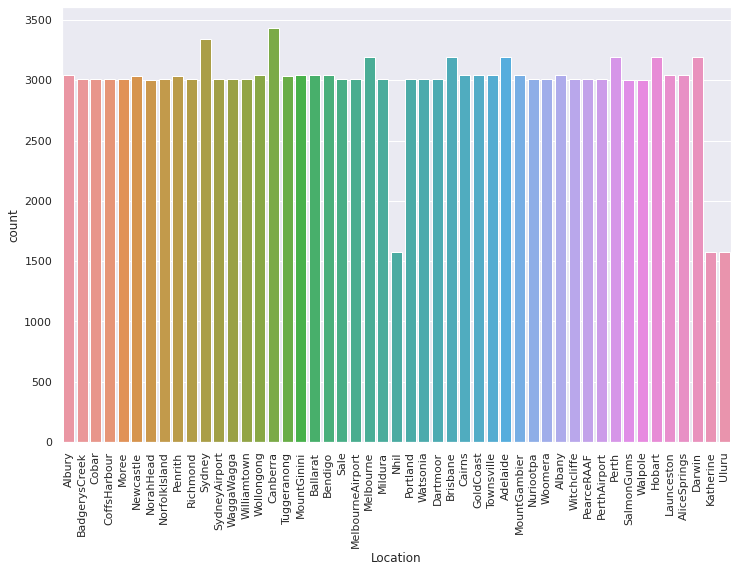

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(df['Location'], ax = ax)
plt.xticks(rotation=90)
plt.show()

Luego analizamos las direcciones del viento, cuantas categorias tienen y si poseen valores NaN.

In [27]:
print(df['WindGustDir'].unique())
print(df['WindDir9am'].unique())
print(df['WindDir3pm'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


In [28]:
print(df['WindGustDir'].unique().shape[0])
print(df['WindDir9am'].unique().shape[0])
print(df['WindDir3pm'].unique().shape[0])

17
17
17


Las tres variables tienen 16 categorias (17 con nan) y son iguales en las 3

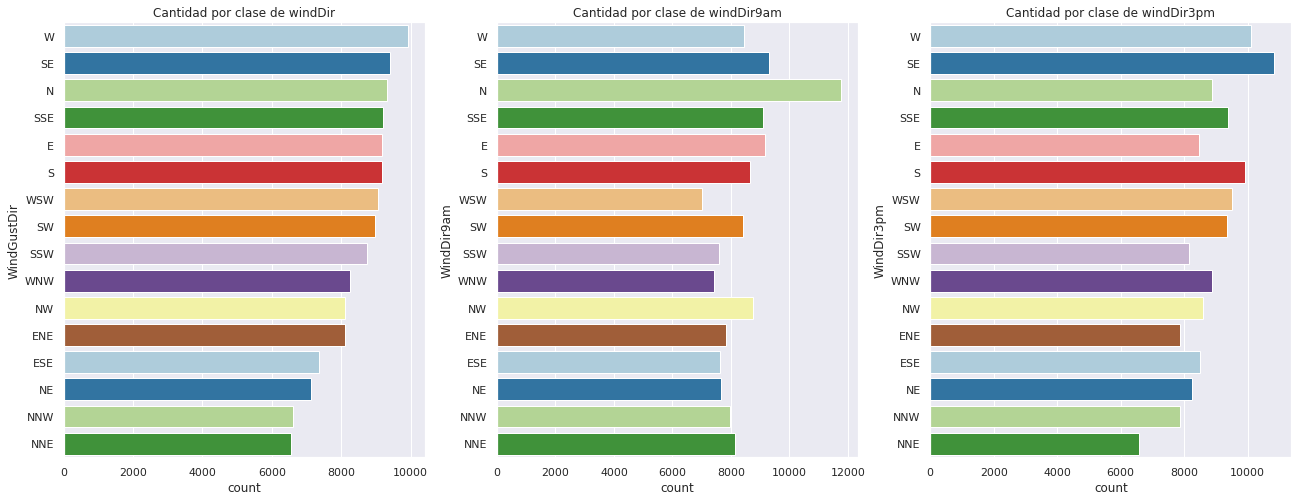

In [29]:
fig, ax = plt.subplots(1,3, figsize=(22,8))

sns.countplot(data=df, y='WindGustDir', ax = ax[0], palette='Paired', order=df['WindGustDir'].value_counts().index)
sns.countplot(data=df, y='WindDir9am', ax = ax[1], palette='Paired', order=df['WindGustDir'].value_counts().index)
sns.countplot(data=df, y='WindDir3pm', ax = ax[2], palette='Paired', order=df['WindGustDir'].value_counts().index)

ax[0].set_title('Cantidad por clase de windDir')
ax[1].set_title('Cantidad por clase de windDir9am')
ax[2].set_title('Cantidad por clase de windDir3pm')

plt.show()

Por ultimo observamos la varabiale RainToday, analizamos si posee NaN y si esta balanceada.

In [30]:
print(df['RainToday'].unique())

['No' 'Yes' nan]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


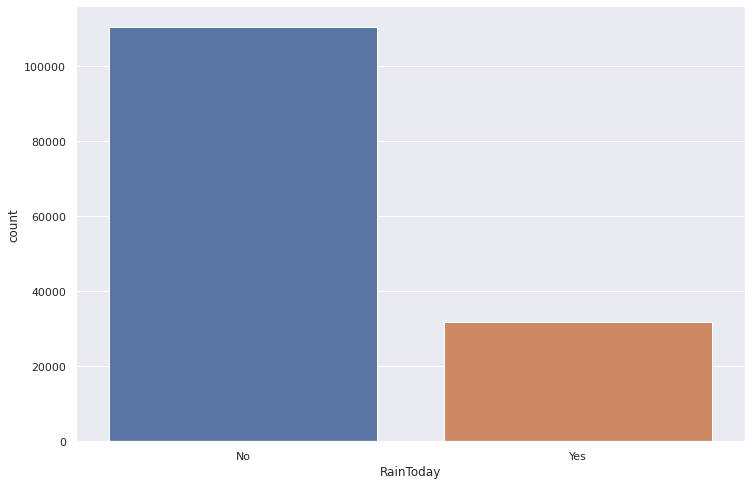

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(df['RainToday'], ax = ax)
plt.show()

Como se puede observar, la variable RainToday no se encuentra valanceada, teniando mayor cantidad de muestra para casos que no llueve lo que podria producir un sesgo en el resultado de la prediccion de la variable de salida.

#### Variables Compuestas (fecha)

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [33]:
df[['Date', 'Day', 'Month', 'Year']].dtypes

Date     datetime64[ns]
Day               int64
Month             int64
Year              int64
dtype: object

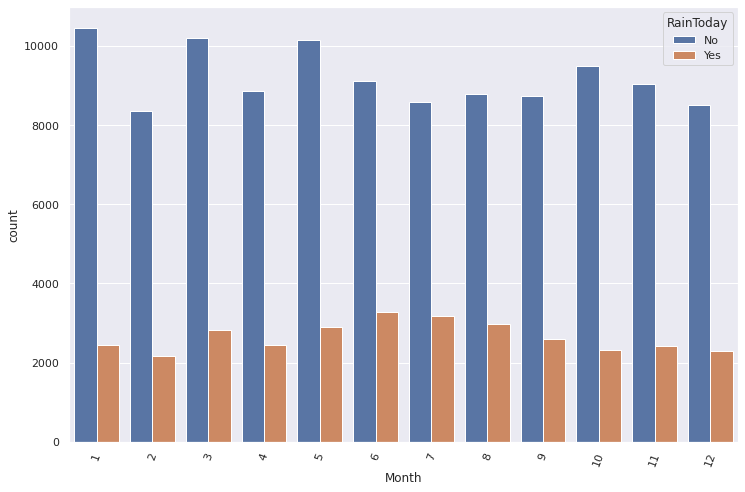

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(data=df, x='Month', hue='RainToday', ax = ax,)
plt.xticks(rotation=70)
plt.show()

En el grafico anterior se intenta observar si hay algun mes del año el cual hay mayor cantidad de lluvias. Por lo observado para los meses de Junio Julio y Agosto hay un leve aumento de la cantidad de lluvias. Ademas se observa nuevamente la cantidad de datos defasados entre los dias que llueve y los dias que no llueve.

In [35]:
df_time = df.copy()

le = LabelEncoder()

df_time.dropna(subset=['RainToday'],inplace=True)

In [36]:
le.fit(df_time['RainToday'])

LabelEncoder()

In [37]:
df_time['RainToday'] = le.transform(df_time['RainToday'])

In [38]:
df_time['RainToday'].value_counts()

0    110319
1     31880
Name: RainToday, dtype: int64

In [39]:
df_time_m = df_time[['Month', 'RainToday']].groupby('Month').mean().reset_index()
df_time_y = df_time[['Year', 'RainToday']].groupby('Year').mean().reset_index()

In [40]:
df_time_m

,Month,RainToday
0,1,0.189484
1,2,0.206746
2,3,0.217135
3,4,0.216845
4,5,0.222163
5,6,0.263638
6,7,0.270736
7,8,0.253167
8,9,0.229135
9,10,0.196512


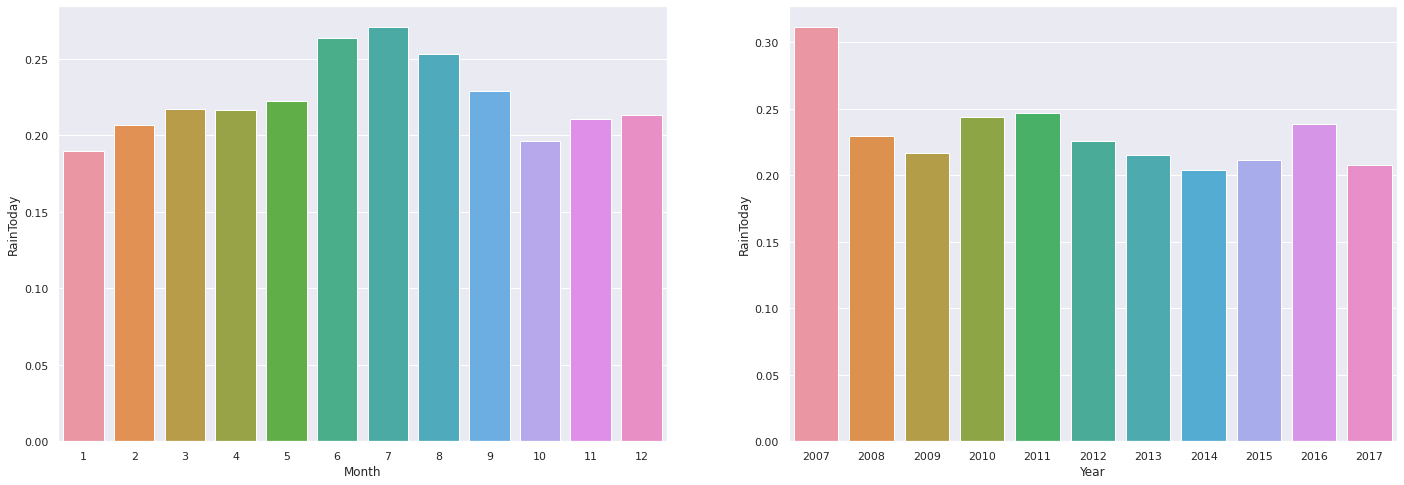

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))

sns.barplot(data=df_time_m, x='Month', y='RainToday', ax = ax[0])
sns.barplot(data=df_time_y, x='Year', y='RainToday', ax = ax[1])
plt.show()

Como se puede observar, para el grafico de meses se aprecia mejor el leve aumento para los meses de Junio, Julio y Agosto y para el caso del grafico de lluvias anuales, no se puede inferir nada.

###Variables de salida

En el caso de las variables de salida, se selecciona el campo RainTomorrow que indica si llovera al dia siguiente o no. La variable es tipo categorica donde toma dos valores (yes-no). A continuacion se analiza la cantidad de nan de la salida y si la misma se encuentra balanceada.

In [42]:
df['RainTomorrow'].shape[0]

145460

In [43]:
df['RainTomorrow'].isna().sum()

3267

In [44]:
#Porcentage de NaN respecto de la salida
(df['RainTomorrow'].isna().sum()/df['RainTomorrow'].shape[0])*100

2.245978275814657

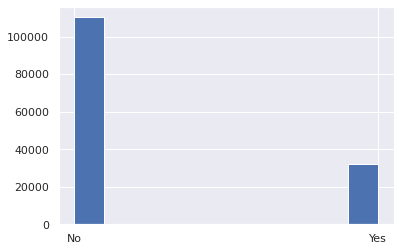

In [45]:
df['RainTomorrow'].hist()

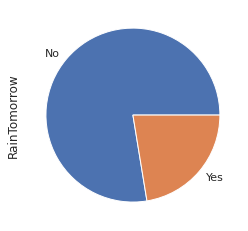

In [46]:
df['RainTomorrow'].value_counts().plot.pie()

Como se puede observar, la variable de salida esta altamente desbalanceada, hay mayor cantidad de variables de salida negativos que positivo. Se puede proceder de distintas manera ya sea equiparando la cantidad de muestras de cada calase o o usar librerias avanzadas para tratamiento de clases desbalanceadas.

## Limpieza y preparación de datos / ingeniería de features

A continuacion, indicaremos la cantidad de obsrvaciones y los valores faltantes para cada variable.

In [47]:
valoresFaltante=df.isnull().sum() # missing values
porcentajeFaltante = df.isnull().sum()/df.shape[0]*100 # missing value %
value = {
    'valoresFaltante ':valoresFaltante,
    'porcentajeFaltante %':porcentajeFaltante , 
     'data type' : df.dtypes
}
nullInfo=pd.DataFrame(value)

In [48]:
nullInfo.sort_values('porcentajeFaltante %', ascending=False)

,valoresFaltante,porcentajeFaltante %,data type
Sunshine,69835,48.009762,float64
Evaporation,62790,43.166506,float64
Cloud3pm,59358,40.807095,float64
Cloud9am,55888,38.421559,float64
Pressure9am,15065,10.356799,float64
Pressure3pm,15028,10.331363,float64
WindDir9am,10566,7.263853,object
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
Humidity3pm,4507,3.098446,float64


De todos los features de nuestro dataset, se debe prestar atencion a sunshine, evaporation cloud3pm y cloud9am que presentan un porcentaje de valores faltantes mayores a 38%

In [49]:
#Analizo nan en filas
nans = df.loc[df.isna().sum(axis=1) >= 1, :]
print(nans.shape)

(89040, 26)


In [50]:
#Analizo no_nan en filas
non_nans = df.loc[df.isna().sum(axis=1) == 0, :]
print(non_nans.shape)

(56420, 26)


In [51]:
porcentaje_nan = nans.shape[0]/(nans.shape[0]+non_nans.shape[0])*100

In [52]:
porcentaje_nan

61.21270452358036

Del analisis anterior se desprende que un 60% de nuestro dataset tiene al menos un NaN

In [53]:
#¿Qué supuestos puede realizar acerca de los datos faltantes? 
#¿Qué técnicas de imputación recomendaría?
#Ensayar distintas técnicas y analizar los resultados


In [54]:
mask_nan=((df['Sunshine'].isna()==True)&(df['Cloud9am'].isna()==True)&(df['Cloud3pm'].isna()==True))

In [55]:
#Cantidad de NaN que hay cuando Sunshine, cloud 9am y cloud3pm sons nan
mask_nan.sum()/df.shape[0]*100

29.89550391860305

De los datos anteriores, se observa que para sunshine evaporation cloud9am y cloud3pm tenemos entre un 37 y un 48% de NaN. Haciendo un analisis de la cantidad de datos que tienen NaN en Sunshine, cloud9am y cloud3p al mismo tiempo arroja un resultado de 29% por lo que tenemos una fuerte correlacion de NaN en sunshine cloud9am y cloud3pm

In [56]:
mask_nan = (df['Sunshine'].isna()==True)

In [57]:
columns = ['Evaporation', 'Cloud3pm', 'Cloud9am']
for column in columns:
  nan_perc = df.loc[mask_nan, column].isna().sum()/df.loc[mask_nan, column].shape[0]
  print("Porcentaje de valores faltantes para la feature {}: {:.2f}".format(column, nan_perc*100))

Porcentaje de valores faltantes para la feature Evaporation: 83.84
Porcentaje de valores faltantes para la feature Cloud3pm: 70.15
Porcentaje de valores faltantes para la feature Cloud9am: 67.47


Como se puede observar, cuando faltan valores de sunshine, hay un alto porcentaje de valores faltantes para evaporacion y nubosidad

In [58]:
mask_nan = (df['Cloud9am'].isna()==True)
nan_perc = df.loc[mask_nan, 'Cloud3pm'].isna().sum()/df.loc[mask_nan, 'Cloud3pm'].shape[0]
print("Porcentaje de valores faltantes para la feature cloud9am y cloud 3pm: {}".format(nan_perc))

Porcentaje de valores faltantes para la feature cloud9am y cloud 3pm: 0.9258517034068137


Claramente existe una relacion para los valores faltantes de cloud9am y cloud3pm

In [59]:
mask_nan = (df['Sunshine'].isna()==True)
mask_nan_c9 = (df['Cloud9am'].isna()==True)
mask_nan_c3 = (df['Cloud3pm'].isna()==True)

loc_nan = df.loc[mask_nan, 'Location']
loc_nan_c9 = df.loc[mask_nan_c9, 'Location']
loc_nan_c3 = df.loc[mask_nan_c3, 'Location']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


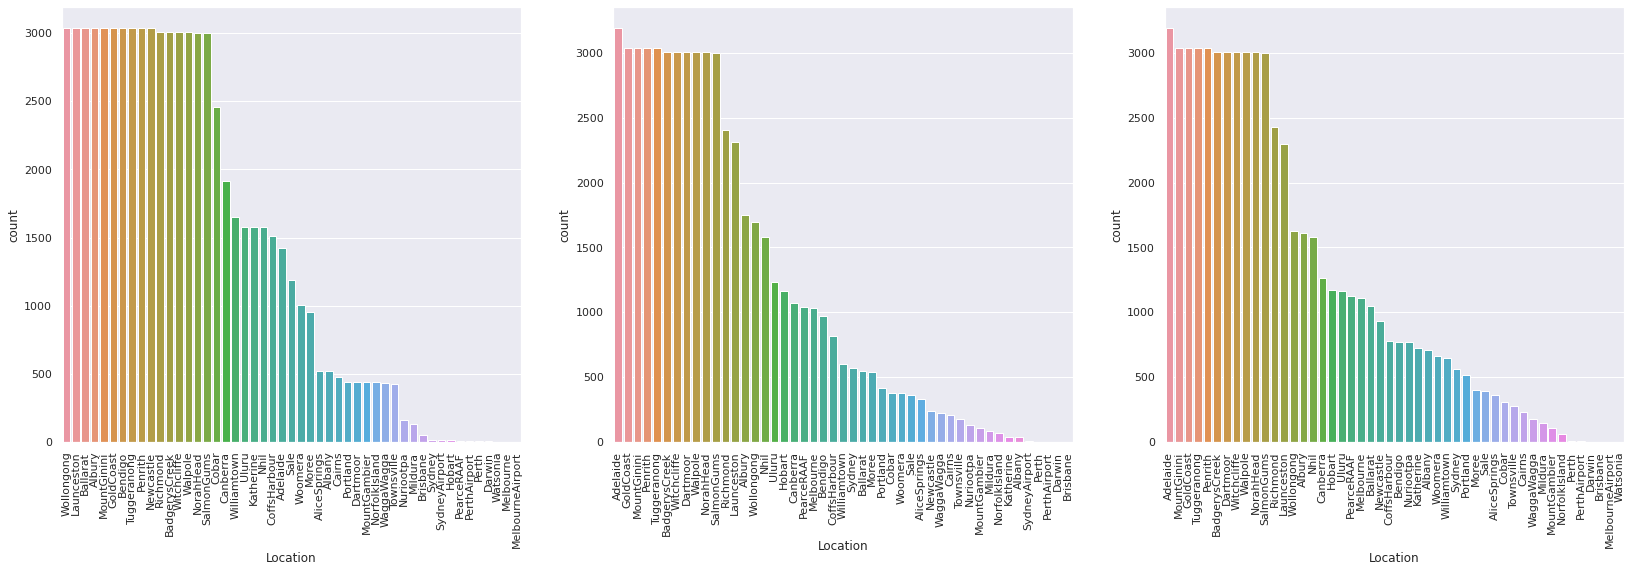

In [60]:
fig, ax = plt.subplots(1, 3, figsize=(28, 8))
sns.countplot(loc_nan, ax = ax[0], order=loc_nan.value_counts().index)
sns.countplot(loc_nan_c9, ax = ax[1], order=loc_nan_c9.value_counts().index)
sns.countplot(loc_nan_c3, ax = ax[2], order=loc_nan_c3.value_counts().index)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()

A pesar de que se ve que los valores faltantes estan concentrados en una pocas ciudades, no es suficiente para establecer una relacion entre la ubicacion y los valore faltantes de sunshine.

###Imputacion de valores faltantes

Se planifica utilizar tecnicas multivariables para imputar los NaN en valores numericos. Para ellos se debe utilizar el resto de las featueres disponibles y es por ello que debemos codificar las variables categoricas. Antes de codificar las mismas, devemos imputar sus valores faltantes.
Otro analisis que se deberia realizar es el de outlier, lo cual suele tener injerencia en la imputacion de valores faltantes.

#### Variable categorica: RainToday

Considerando que la variable RainTdoay tiene gran influencia sobre RainTomorrow, no se imputaran los valores faltantes de la misma y dicha fila sera eliminada.

In [61]:
#idx_rt_nan=X_trdfain['RainToday'].isna()==False

In [62]:
#y_train_rt = y_train[idx_rt_nan]

In [63]:
#y_train_rt.shape

In [64]:
df.dropna(subset=['RainToday'], inplace=True)
df['RainToday'].isna().sum()

0

In [65]:
df.shape

(142199, 26)

Para utilizar MICE o KNN tenemos que codificar la imputacion de valores faltantes, para ellos utilizaremos la tecnica de Label Encoding para codificar la variable RainToday

In [66]:
le_raintoday = LabelEncoder()
le_raintoday.fit(df['RainToday'])

LabelEncoder()

In [67]:
df['RainToday'] = le_raintoday.transform(df['RainToday'])

In [68]:
df['RainToday'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: RainToday, dtype: int64

#### Variable categorica: Wind

A continuacion se trataran las variables categoricas del viento, en ese caso se imputaran tomando en cuanta la moda de cada una de ellas.

In [69]:
#Imputacion de variables categoricas con la moda

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [70]:
#Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
valoresFaltante=df.isnull().sum() # missing values
porcentajeFaltante = df.isnull().sum()/df.shape[0]*100 # missing value %
value = {
    'valoresFaltante ':valoresFaltante,
    'porcentajeFaltante %':porcentajeFaltante , 
     'data type' : df.dtypes
}
nullInfo=pd.DataFrame(value)

In [71]:
nullInfo.sort_values('porcentajeFaltante %', ascending=False)

,valoresFaltante,porcentajeFaltante %,data type
Sunshine,67820,47.693725,float64
Evaporation,60488,42.537571,float64
Cloud3pm,56874,39.996062,float64
Cloud9am,53331,37.504483,float64
Pressure3pm,13993,9.840435,float64
Pressure9am,13940,9.803163,float64
WindGustSpeed,9665,6.796813,float64
Humidity3pm,3630,2.552761,float64
Temp3pm,2746,1.931097,float64
WindSpeed3pm,2647,1.861476,float64


Para utilizar MICE o KNN tenemos que codificar la imputacion de valores faltantes, para ellos utilizaremos la tecnica de One Hot Encoding para codificar las categorias del viento.

In [72]:
wind_names = []

In [73]:
cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
abb = {'WindGustDir':'WGD', 'WindDir9am':'WD9', 'WindDir3pm':'WD3'}
for col in cols:
  col_unique = sorted(df[col].unique())
  col_sorted = [abb[col] + "_" + x for x in col_unique]
  wind_names.append(np.array(col_sorted))
  


In [74]:
ohe_encoder = OneHotEncoder(categories='auto',
                           drop=None, 
                           sparse=False
)
ohe_encoder.fit(df[cols].values)
wind_encoded = ohe_encoder.transform(df[cols].values)
cat_names = np.array(wind_names).ravel()
windir_df = pd.DataFrame(wind_encoded, columns=cat_names).astype(int)

In [75]:
#Hacemos reset index por que los dos dataframe a concatenar tiene indices distintos que percisten en el merge
df = pd.concat([df.reset_index(), windir_df], axis=1).drop(cols, axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142199 entries, 0 to 142198
Data columns (total 72 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   index          142199 non-null  int64         
 1   Date           142199 non-null  datetime64[ns]
 2   Location       142199 non-null  object        
 3   MinTemp        141712 non-null  float64       
 4   MaxTemp        141729 non-null  float64       
 5   Rainfall       142199 non-null  float64       
 6   Evaporation    81711 non-null   float64       
 7   Sunshine       74379 non-null   float64       
 8   WindGustSpeed  132534 non-null  float64       
 9   WindSpeed9am   141108 non-null  float64       
 10  WindSpeed3pm   139552 non-null  float64       
 11  Humidity9am    140645 non-null  float64       
 12  Humidity3pm    138569 non-null  float64       
 13  Pressure9am    128259 non-null  float64       
 14  Pressure3pm    128206 non-null  float64       
 15  

#### Variables numericas (KNN o MICE)

In [ ]:
#le_y = LabelEncoder()
#le_y.fit_transform(y_train_rt)


In [80]:
df.dropna(subset=['RainTomorrow'], inplace=True) #Con esto eliminamos los NaN

In [81]:
#location = X_train.drop('Location', axis=1, inplace=True)
#date = X_train.drop('Date',axis=1, inplace=True)
# Creación de un nuevo dataframe sin Location ni Date
df_imp = df.drop(['Location', 'Date'], axis=1)
dfX_imp = df_imp.drop('RainTomorrow', axis=1, inplace=False) #Con eso podemos sacar features
dfy_imp = df_imp['RainTomorrow']

In [82]:
dfX_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 142197
Data columns (total 69 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          140787 non-null  int64  
 1   MinTemp        140319 non-null  float64
 2   MaxTemp        140480 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81093 non-null   float64
 5   Sunshine       73982 non-null   float64
 6   WindGustSpeed  131682 non-null  float64
 7   WindSpeed9am   139732 non-null  float64
 8   WindSpeed3pm   138256 non-null  float64
 9   Humidity9am    139270 non-null  float64
 10  Humidity3pm    137286 non-null  float64
 11  Pressure9am    127044 non-null  float64
 12  Pressure3pm    127018 non-null  float64
 13  Cloud9am       88162 non-null   float64
 14  Cloud3pm       84693 non-null   float64
 15  Temp9am        140131 non-null  float64
 16  Temp3pm        138163 non-null  float64
 17  RainToday      140787 non-nul

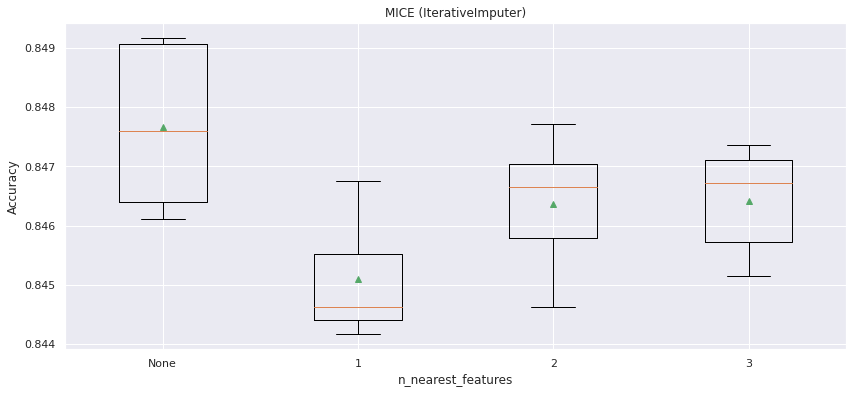

In [83]:
cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Day', 'Month', 'Year']
results=[]
param_grid = {
    "imputer__n_nearest_features": [None,1,2,3]
}
for param in param_grid["imputer__n_nearest_features"]:
    pipeline = Pipeline(steps=[( 'imputer' ,IterativeImputer(n_nearest_features=param)), ( 'lr' , LogisticRegression(max_iter=1000) )])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
    scores = cross_val_score(pipeline, dfX_imp[cols], dfy_imp, scoring= 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)
    
fig,axes = plt.subplots(1,figsize=(14,6))
axes.boxplot(results,labels=[x or "None" for x in param_grid["imputer__n_nearest_features"]],showmeans=True)
axes.set_xlabel("n_nearest_features")
axes.set_ylabel("Accuracy")
axes.set_title("MICE (IterativeImputer)");

In [84]:
mice_imputer = IterativeImputer(n_nearest_features=None)
cols_imputed = mice_imputer.fit_transform(dfX_imp[cols])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [85]:
dfX_imp[cols] = cols_imputed
dfX_imp.isna().sum()

index          0
MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
              ..
WD3_SSW        0
WD3_SW         0
WD3_W          0
WD3_WNW        0
WD3_WSW        0
Length: 69, dtype: int64

## Esquema de validación de resultados

Vamos a separar el dataset en un conjunto de entrenamiento y otro de validacion.
Antes de hacer el split entre entrada y salida, eliminaremos los NaN de la salida.

In [87]:
#Vamos a hacer split del dataset
#x = df.drop('RainTomorrow', axis=1, inplace=False) #Con eso podemos sacar features
#y = df['RainTomorrow']

 #Como es un dataset desbalanceado, es deseable mantener el desbalance para eso se usa el comando stratify
X_train, X_test, y_train, y_test = train_test_split(dfX_imp, dfy_imp, test_size=0.30, random_state=42, stratify=dfy_imp)



In [88]:
X_train.shape

(98550, 69)

In [89]:
y_train.shape

(98550,)

In [90]:
X_test.shape

(42237, 69)

#### Balanceamos el dataset

In [91]:
#Juntamos x_train e y_train para balancear
X_train['RainTomorrow'] = y_train


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
X_train.head(5)

,index,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year,WGD_E,WGD_ENE,WGD_ESE,WGD_N,WGD_NE,WGD_NNE,WGD_NNW,WGD_NW,WGD_S,WGD_SE,WGD_SSE,WGD_SSW,WGD_SW,WGD_W,WGD_WNW,WGD_WSW,WD9_E,WD9_ENE,WD9_ESE,WD9_N,WD9_NE,WD9_NNE,WD9_NNW,WD9_NW,WD9_S,WD9_SE,WD9_SSE,WD9_SSW,WD9_SW,WD9_W,WD9_WNW,WD9_WSW,WD3_E,WD3_ENE,WD3_ESE,WD3_N,WD3_NE,WD3_NNE,WD3_NNW,WD3_NW,WD3_S,WD3_SE,WD3_SSE,WD3_SSW,WD3_SW,WD3_W,WD3_WNW,WD3_WSW,RainTomorrow
9157,9289,9.1,23.3,0.0,2.600000,8.400000,35.0,13.0,28.0,61.0,60.0,1021.100000,1016.000000,4.000000,4.000000,17.7,20.2,0.0,20.0,8.0,2009.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,No
101666,104246,8.3,31.7,0.0,6.800000,13.200000,41.0,7.0,17.0,43.0,6.0,1014.100000,1009.500000,0.000000,1.000000,21.9,30.9,0.0,18.0,11.0,2013.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,No
74229,76461,1.2,16.9,0.0,2.000000,9.000000,35.0,11.0,17.0,79.0,55.0,1024.400000,1019.100000,1.773429,2.000000,11.1,16.4,0.0,20.0,4.0,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,No
121807,124772,7.6,15.3,1.2,3.984969,5.985113,54.0,30.0,28.0,60.0,58.0,1015.906673,1015.664402,4.915201,5.608055,11.9,12.9,1.0,7.0,9.0,2011.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,No
72685,74910,4.9,24.7,0.0,5.426880,11.022231,30.0,22.0,11.0,58.0,28.0,1022.300000,1020.300000,1.357101,2.475847,15.1,24.1,0.0,17.0,4.0,2017.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


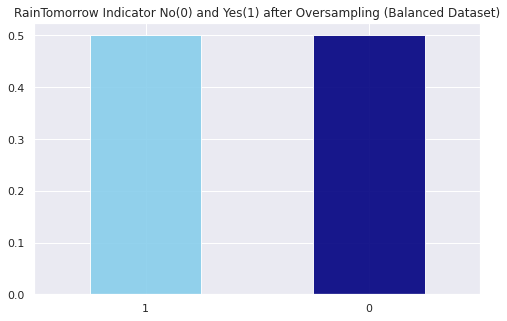

In [95]:
X_train['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
no = X_train[X_train.RainTomorrow == 0]
yes = X_train[X_train.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df_oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
df_oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [96]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153418 entries, 9157 to 7834
Data columns (total 70 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          153418 non-null  int64  
 1   MinTemp        153418 non-null  float64
 2   MaxTemp        153418 non-null  float64
 3   Rainfall       153418 non-null  float64
 4   Evaporation    153418 non-null  float64
 5   Sunshine       153418 non-null  float64
 6   WindGustSpeed  153418 non-null  float64
 7   WindSpeed9am   153418 non-null  float64
 8   WindSpeed3pm   153418 non-null  float64
 9   Humidity9am    153418 non-null  float64
 10  Humidity3pm    153418 non-null  float64
 11  Pressure9am    153418 non-null  float64
 12  Pressure3pm    153418 non-null  float64
 13  Cloud9am       153418 non-null  float64
 14  Cloud3pm       153418 non-null  float64
 15  Temp9am        153418 non-null  float64
 16  Temp3pm        153418 non-null  float64
 17  RainToday      153418 non-nu

#### Analisis de outliers

In [97]:
# Detectar outliers con IQR
Q1 = df_oversampled.quantile(0.25)
Q3 = df_oversampled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

index           72485.000000
MinTemp             9.200000
MaxTemp            10.200000
Rainfall            2.200000
Evaporation         4.153523
                    ...     
WD3_SW              0.000000
WD3_W               0.000000
WD3_WNW             0.000000
WD3_WSW             0.000000
RainTomorrow        1.000000
Length: 70, dtype: float64


#### Matriz de correlacion

A continuacion analizaremos la matriz de correlacion para analizar que valores se pueden excluir del modelo por ser fuertemente correlacionados

<function matplotlib.pyplot.show>

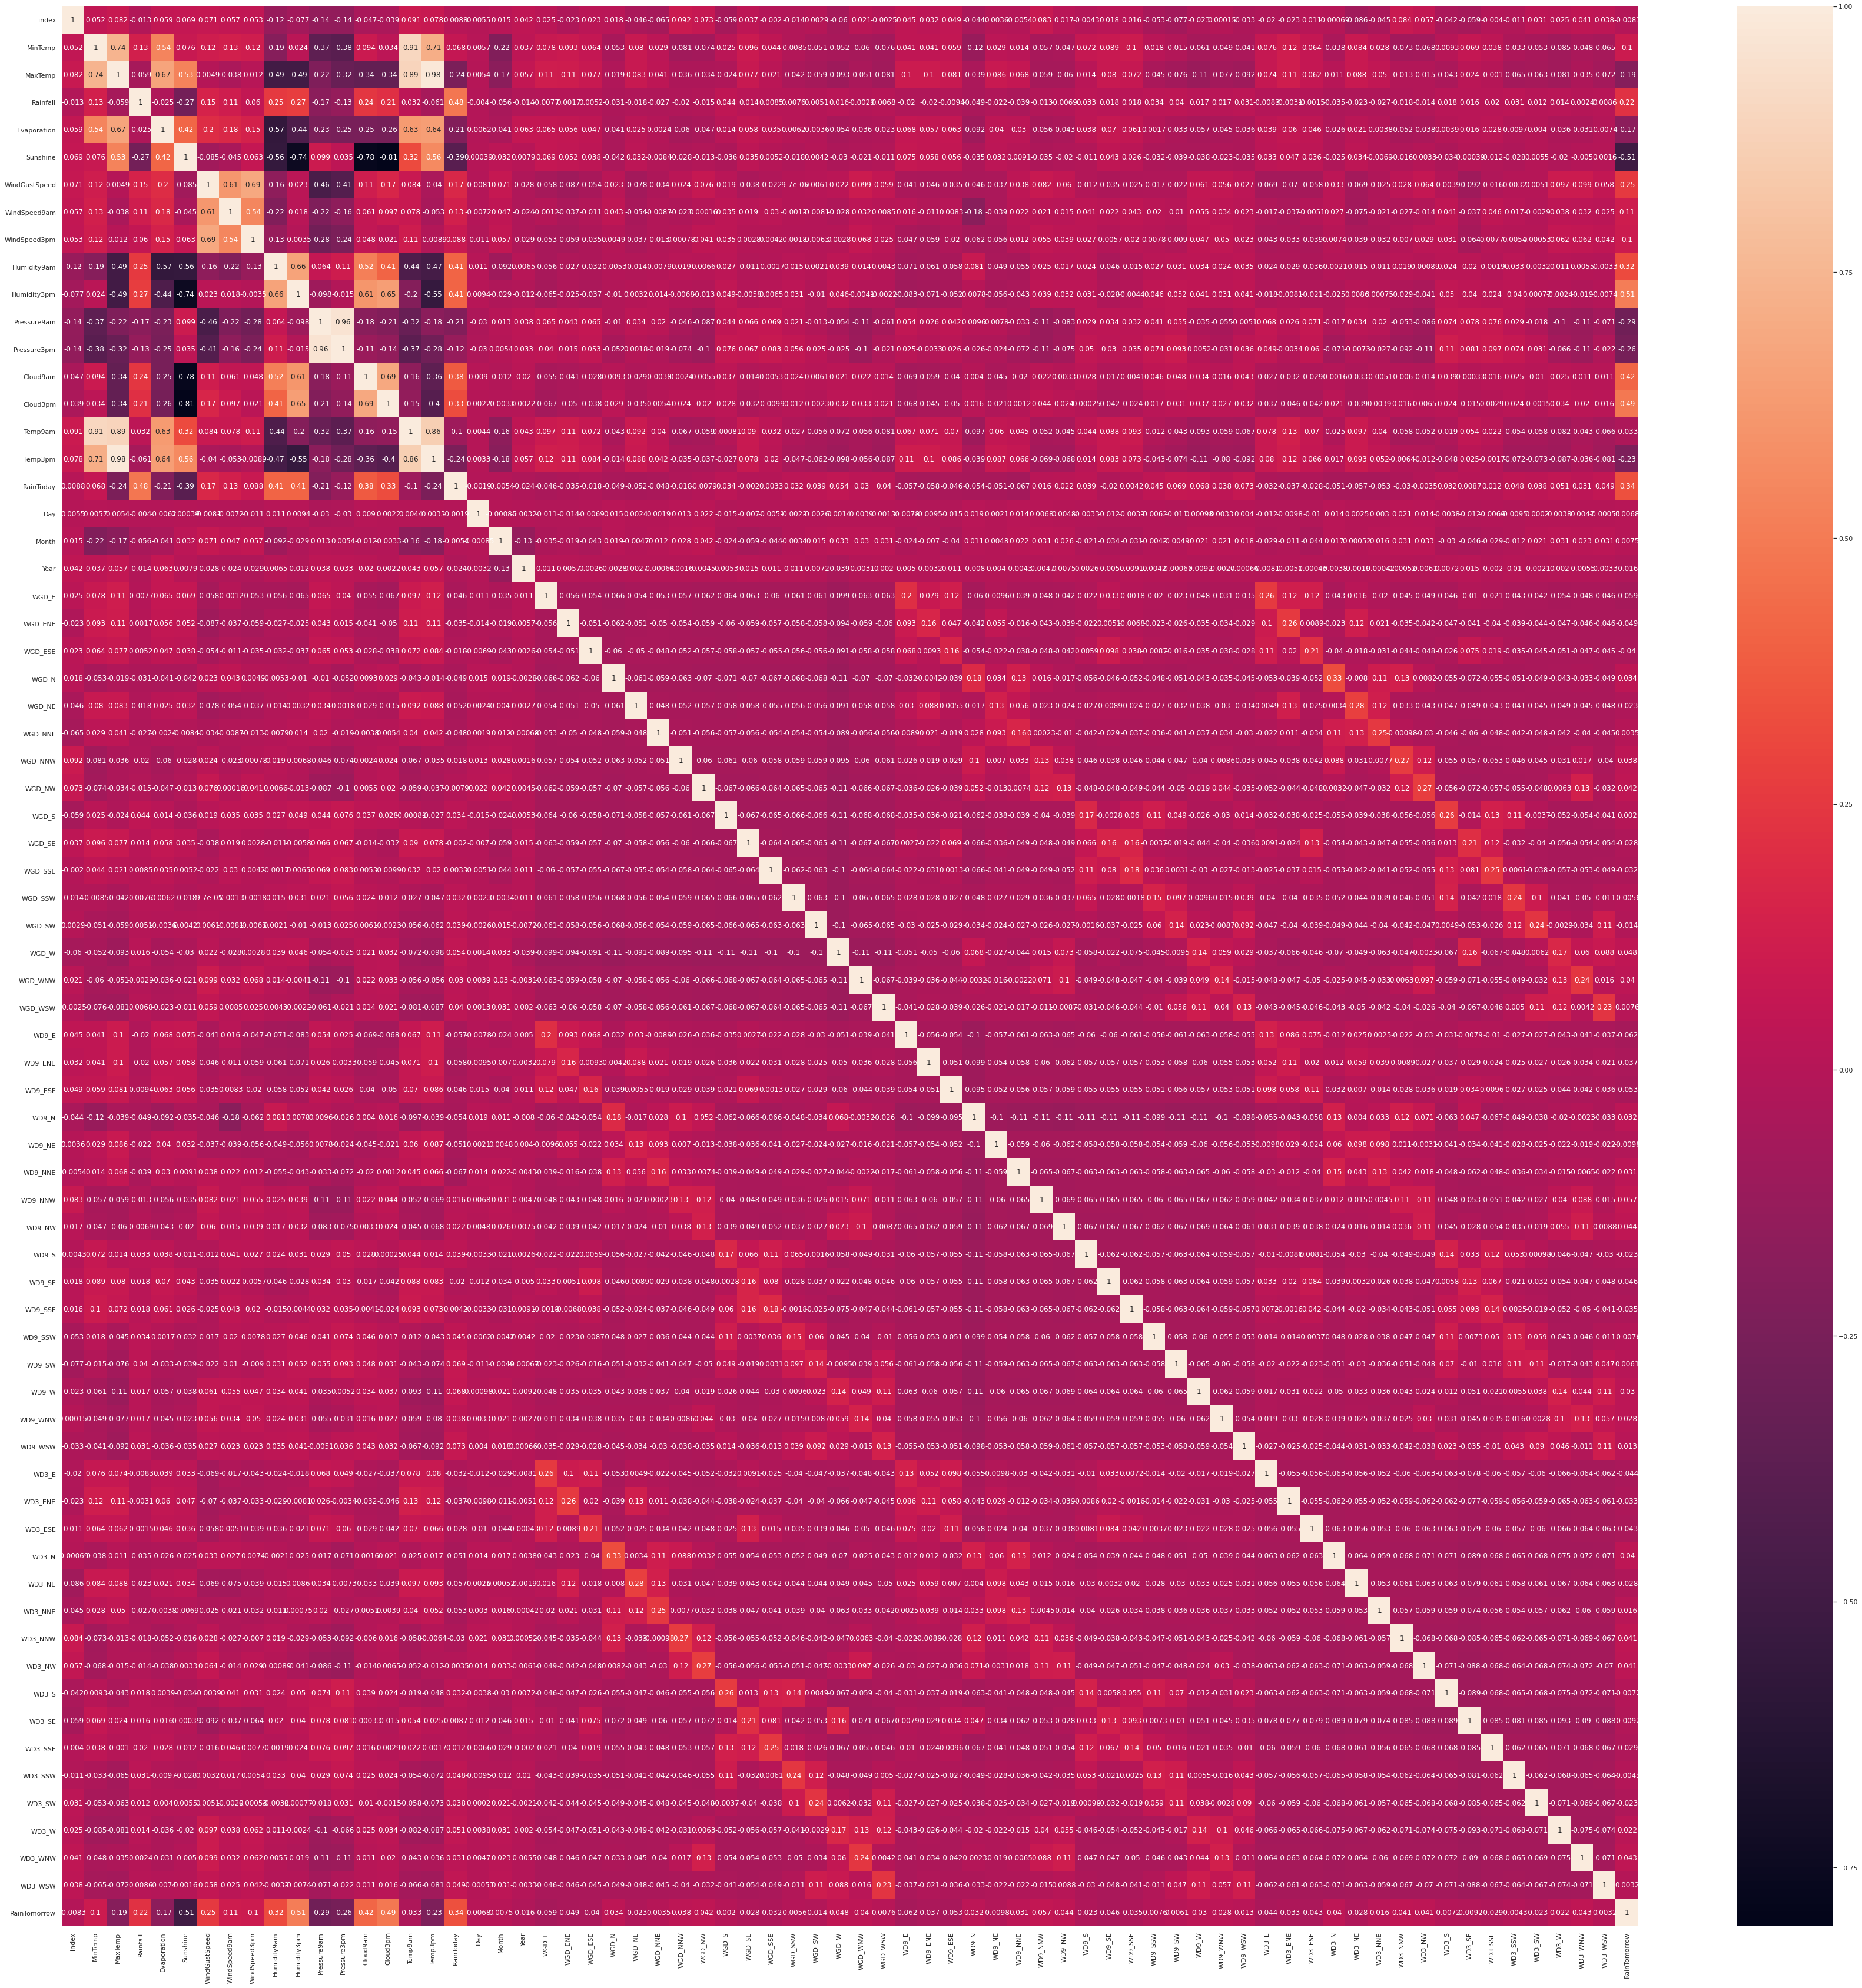

In [98]:
# plotting a correlation matrix 
plt.figure(figsize=(60,60))
sns.heatmap(df_oversampled.corr(),annot=True)
plt.xticks(rotation=90)
plt.show

Como se puede observar en la matriz de correlacion:

* Temp9am y MaxTemp estan altamente correlacionados
* Temp9am y MinTemp estan altamente correlacionados
* Temp3pm y MaxTemp estan altamente correlacionados
* Temp3pm y MinTemp estan altamente correlacionados
* Pressure9am y Pressure3pm estan altamente correlacionados
* MinTemp y MaxTemp estan altamente correlacionados

Por ello, para redicir el tamaño deld ataset se eliminaran las columnas que estan altamente correlacionadas.



In [99]:
# Hacemor drop de las columnas altamente correlacionadas y de la salida
df_oversampled.drop(["Temp9am", "Temp3pm", "Pressure3pm","MaxTemp"], axis=1, inplace=True)
df_oversampled.columns

Index(['index', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'Day', 'Month', 'Year', 'WGD_E', 'WGD_ENE', 'WGD_ESE', 'WGD_N',
       'WGD_NE', 'WGD_NNE', 'WGD_NNW', 'WGD_NW', 'WGD_S', 'WGD_SE', 'WGD_SSE',
       'WGD_SSW', 'WGD_SW', 'WGD_W', 'WGD_WNW', 'WGD_WSW', 'WD9_E', 'WD9_ENE',
       'WD9_ESE', 'WD9_N', 'WD9_NE', 'WD9_NNE', 'WD9_NNW', 'WD9_NW', 'WD9_S',
       'WD9_SE', 'WD9_SSE', 'WD9_SSW', 'WD9_SW', 'WD9_W', 'WD9_WNW', 'WD9_WSW',
       'WD3_E', 'WD3_ENE', 'WD3_ESE', 'WD3_N', 'WD3_NE', 'WD3_NNE', 'WD3_NNW',
       'WD3_NW', 'WD3_S', 'WD3_SE', 'WD3_SSE', 'WD3_SSW', 'WD3_SW', 'WD3_W',
       'WD3_WNW', 'WD3_WSW', 'RainTomorrow'],
      dtype='object')

In [100]:
df_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153418 entries, 9157 to 7834
Data columns (total 66 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          153418 non-null  int64  
 1   MinTemp        153418 non-null  float64
 2   Rainfall       153418 non-null  float64
 3   Evaporation    153418 non-null  float64
 4   Sunshine       153418 non-null  float64
 5   WindGustSpeed  153418 non-null  float64
 6   WindSpeed9am   153418 non-null  float64
 7   WindSpeed3pm   153418 non-null  float64
 8   Humidity9am    153418 non-null  float64
 9   Humidity3pm    153418 non-null  float64
 10  Pressure9am    153418 non-null  float64
 11  Cloud9am       153418 non-null  float64
 12  Cloud3pm       153418 non-null  float64
 13  RainToday      153418 non-null  float64
 14  Day            153418 non-null  float64
 15  Month          153418 non-null  float64
 16  Year           153418 non-null  float64
 17  WGD_E          153418 non-nu

## Entrenamiento de modelos

Una vez que tnemos el dataset con todos los NaN imputados, balanceado y con las columnas altamente correlacioandas eliminadas, procedemos a entrenar el modelo. Primero vamos a aplicar RandomForest y luego Regresion Logistica.

In [101]:
# Separamos RainTomorrow
xTrain = df_oversampled.drop(['RainTomorrow'], axis=1)
yTrain = df_oversampled["RainTomorrow"]

### RandomForest

In [102]:
xTrain.shape

(153418, 65)

In [103]:
%%time

clf1 = RandomForestClassifier(n_jobs=-1, random_state=12)
clf1.fit(xTrain, yTrain)

CPU times: user 1min 1s, sys: 259 ms, total: 1min 1s
Wall time: 31.6 s


In [ ]:
#X_test.drop(["Temp9am", "Temp3pm", "Pressure3pm","MaxTemp"], axis=1, inplace=True)
y_test.replace({'No': 0, 'Yes': 1},inplace = True)

In [114]:
clf1.score(X_test, y_test)

0.8571868267159126

In [115]:
y_preds = clf1.predict(X_test)

In [118]:
print(confusion_matrix(y_test, y_preds))

[[30719  2158]
 [ 3874  5486]]


In [119]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     32877
           1       0.72      0.59      0.65      9360

    accuracy                           0.86     42237
   macro avg       0.80      0.76      0.78     42237
weighted avg       0.85      0.86      0.85     42237



### Regresion Logistica

In [120]:
%%time
# Instantiate the model
clf2 = LogisticRegression(n_jobs=-1, random_state=12)

# Fit the model
clf2.fit(xTrain, yTrain)

CPU times: user 245 ms, sys: 245 ms, total: 490 ms
Wall time: 26.1 s


In [121]:
# score the model
clf2.score(X_test, y_test)

0.785732888225963

In [122]:
# make a confusion matrix and classification report
y_preds = clf2.predict(X_test)
print(confusion_matrix(y_test, y_preds))

[[26045  6832]
 [ 2218  7142]]


In [123]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85     32877
           1       0.51      0.76      0.61      9360

    accuracy                           0.79     42237
   macro avg       0.72      0.78      0.73     42237
weighted avg       0.83      0.79      0.80     42237



Despues de entranar y evaluar 2 modelos, observamos que Random Fores da mejores resultados que Regresion Logistica.